## Sentiment analyse twitter

In [53]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import re

### We load an explore our labeled dataset 

labeld training set can be download from:http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip

In [54]:
##This chunck is for reading in the train and test data, including a little bit of exploratory.

cols = ['sentiment','id','date','query_string','user','text']
df = pd.read_csv("Datafiles\\training.1600000.processed.noemoticon.csv",header=None, names=cols,encoding="ISO-8859–1")
# above line will be different depending on where you saved your data, and your file name
df.head()
df.drop(['id','date','query_string','user'],axis=1,inplace=True) ## Drop the rows that we dont need
df[df.sentiment == 4].head(10) ## Show some rows of sentiment 4 , looks like 4 is positive


,sentiment,text
800000,4,I LOVE @Health4UandPets u guys r the best!!
800001,4,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart."
800003,4,"Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup"
800004,4,@LovesBrooklyn2 he has that effect on everyone
800005,4,@ProductOfFear You can tell him that I just burst out laughing really loud because of that Thanks for making me come out of my sulk!
800006,4,@r_keith_hill Thans for your response. Ihad already find this answer
800007,4,"@KeepinUpWKris I am so jealous, hope you had a great time in vegas! how did you like the ACM's?! LOVE YOUR SHOW!!"
800008,4,"@tommcfly ah, congrats mr fletcher for finally joining twitter"
800009,4,@e4VoIP I RESPONDED Stupid cat is helping me type. Forgive errors


In [55]:
df[df.sentiment == 0].head(10) ## Show some rows of sentiment 0, looks like 0 is negative

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
5,0,@Kwesidei not the whole crew
6,0,Need a hug
7,0,"@LOLTrish hey long time no see! Yes.. Rains a bit ,only a bit LOL , I'm fine thanks , how's you ?"
8,0,@Tatiana_K nope they didn't have it
9,0,@twittera que me muera ?


In [56]:
df['sentiment'] = df['sentiment'].map({0: 0, 4: 1}) ## Map indicater 4 to 1
df.sentiment.value_counts() ## Check how much labeled is 800k sentiment 4 and 800k sentiment 0

1    800000
0    800000
Name: sentiment, dtype: int64

## We load our untagged dataset

In [57]:
%%time
# Verander in de regel hieronder de locatie van de data
tweets = pd.read_json("Datafiles\\mini_twitter_geotagged_clean.json", orient='records', lines=True)


Wall time: 9.94 s


In [58]:
tweets['ID'] = tweets.index ## Performance reasons and slicing for myself
tweets = tweets[['ID','id','CleanText','text','entities','in_reply_to_status_id', 'quoted_status_id','place']]
tweets.head()

,ID,id,CleanText,text,entities,in_reply_to_status_id,quoted_status_id,place
0,0,764039733076897792,\n\n\nALL IN COLLUSION TOGETHER \n\n\n\n\n\n\nhttpstco5GMNZq40V3,@BarackObama \n@FBI\n@LORETTALYNCH \nALL IN COLLUSION TOGETHER \n\n#NOJUSTICE \n\n@realDonaldTrump \n#TrumpPence \n\nhttps://t.co/5GMNZq40V3,"{'hashtags': [{'text': 'NOJUSTICE', 'indices': [62, 72]}, {'text': 'TrumpPence', 'indices': [93, 104]}], 'urls': [{'url': 'https://t.co/5GMNZq40V3', 'expanded_url': 'http://www.zerohedge.com/news/2016-08-11/justice-department-prevented-fbi-probe-clinton-foundation-reporters-slam-state-depar', 'display_url': 'zerohedge.com/news/2016-08-1…', 'indices': [107, 130]}], 'user_mentions': [{'screen_name': 'BarackObama', 'name': 'Barack Obama', 'id': 813286, 'id_str': '813286', 'indices': [0, 12]}, {'screen_name': 'FBI', 'name': 'FBI', 'id': 17629860, 'id_str': '17629860', 'indices': [14, 18]}, {'screen_name': 'LorettaLynch', 'name': 'AG Loretta Lynch', 'id': 3290070855, 'id_str': '3290070855', 'indices': [19, 32]}, {'screen_name': 'realDonaldTrump', 'name': 'Donald J. Trump', 'id': 25073877, 'id_str': '25073877', 'indices': [75, 91]}], 'symbols': []}",NaN,NaN,"{'id': 'c7ef5f3368b68777', 'url': 'https://api.twitter.com/1.1/geo/id/c7ef5f3368b68777.json', 'place_type': 'city', 'name': 'Baton Rouge', 'full_name': 'Baton Rouge, LA', 'country_code': 'US', 'country': 'United States', 'bounding_box': {'type': 'Polygon', 'coordinates': [[[-91.218994, 30.354161], [-91.218994, 30.564039], [-90.962605, 30.564039], [-90.962605, 30.354161]]]}, 'attributes': {}}"
1,1,764039812479225856,he will do in one year all the things you should have done in eight,@HillaryClinton he will do in one year all the things you should have done in eight,"{'hashtags': [], 'urls': [], 'user_mentions': [{'screen_name': 'HillaryClinton', 'name': 'Hillary Clinton', 'id': 1339835893, 'id_str': '1339835893', 'indices': [0, 15]}], 'symbols': []}",7.626233e+17,NaN,"{'id': '01864a8a64df9dc4', 'url': 'https://api.twitter.com/1.1/geo/id/01864a8a64df9dc4.json', 'place_type': 'city', 'name': 'Melbourne', 'full_name': 'Melbourne, Victoria', 'country_code': 'AU', 'country': 'Australia', 'bounding_box': {'type': 'Polygon', 'coordinates': [[[144.593742, -38.433859], [144.593742, -37.511274], [145.512529, -37.511274], [145.512529, -38.433859]]]}, 'attributes': {}}"
2,2,764039849850482689,clear deliberately throwing this racein 2007 he knew that and destabilization of Mideast started wIraq invasion,"#CNN #newday clear #Trump deliberately throwing this race,in 2007 he knew that #ISIS and destabilization of Mideast started w/Iraq invasion","{'hashtags': [{'text': 'CNN', 'indices': [0, 4]}, {'text': 'newday', 'indices': [5, 12]}, {'text': 'Trump', 'indices': [19, 25]}, {'text': 'ISIS', 'indices': [79, 84]}], 'urls': [], 'user_mentions': [], 'symbols': []}",NaN,NaN,"{'id': 'c0b8e8dc81930292', 'url': 'https://api.twitter.com/1.1/geo/id/c0b8e8dc81930292.json', 'place_type': 'city', 'name': 'Baltimore', 'full_name': 'Baltimore, MD', 'country_code': 'US', 'country': 'United States', 'bounding_box': {'type': 'Polygon', 'coordinates': [[[-76.711521, 39.197211], [-76.711521, 39.372215], [-76.529443, 39.372215], [-76.529443, 39.197211]]]}, 'attributes': {}}"
3,3,764039917924069376,you wouldnt recognize a lie if it came from your own mouth and they do continually NeverTrump,"@realDonaldTrump, you wouldn't recognize a lie if it came from your own mouth, and they do continually. #NeverTrump https://t.co/pKSQM8yikm","{'hashtags': [{'text': 'NeverTrump', 'indices': [104, 115]}], 'urls': [{'url': 'https://t.co/pKSQM8yikm', 'expanded_url': 'https://twitter.com/realdonaldtrump/status/763950742755434498', 'display_url': 'twitter.com/realdonaldtrum…', 'indices': [116, 139]}], 'user_mentions': [{'screen_name': 'realDonaldTrump', 'name': 'Donald J. Trump', 'id': 25073877, 'id_str': '25073877', 'indices': [0, 16]}], 'symbols': []}",NaN,7.639507e+17,"{'id': '4265ece9285a2872', 'url': 'https://api.twitter.com/1.1/

In [59]:
# Create a new coloumn that contains a list with all the mentions used in the tweet
def mentionfinder(row):
    text = row['text'].replace('@'," @")
    mentions = re.findall('(?<![@\w])@(\w{1,25})', text)
    mentions = [x.lower() for x in mentions]
    #mentions = tuple(mentions)
    return mentions

tweets['Mentions'] = tweets.apply(lambda row: mentionfinder(row), axis=1)

In [60]:
# Create a new coloumn that contains a list with all the hastags used in the tweet
def hashtagfinder(row):
    text = row['text'].replace('#'," #")
    hashtags = re.findall('(?:(?<=\s)|(?<=^))#.*?(?=\s|$|\'|\-|[.,\/#!$%\^&\*;:{}=\-_`~()])', text) 
    hashtags = [x.lower() for x in hashtags]
    return hashtags

tweets['Hashtags'] = tweets.apply(lambda row: hashtagfinder(row), axis=1)

In [61]:
tweets.head()

,ID,id,CleanText,text,entities,in_reply_to_status_id,quoted_status_id,place,Mentions,Hashtags
0,0,764039733076897792,\n\n\nALL IN COLLUSION TOGETHER \n\n\n\n\n\n\nhttpstco5GMNZq40V3,@BarackObama \n@FBI\n@LORETTALYNCH \nALL IN COLLUSION TOGETHER \n\n#NOJUSTICE \n\n@realDonaldTrump \n#TrumpPence \n\nhttps://t.co/5GMNZq40V3,"{'hashtags': [{'text': 'NOJUSTICE', 'indices': [62, 72]}, {'text': 'TrumpPence', 'indices': [93, 104]}], 'urls': [{'url': 'https://t.co/5GMNZq40V3', 'expanded_url': 'http://www.zerohedge.com/news/2016-08-11/justice-department-prevented-fbi-probe-clinton-foundation-reporters-slam-state-depar', 'display_url': 'zerohedge.com/news/2016-08-1…', 'indices': [107, 130]}], 'user_mentions': [{'screen_name': 'BarackObama', 'name': 'Barack Obama', 'id': 813286, 'id_str': '813286', 'indices': [0, 12]}, {'screen_name': 'FBI', 'name': 'FBI', 'id': 17629860, 'id_str': '17629860', 'indices': [14, 18]}, {'screen_name': 'LorettaLynch', 'name': 'AG Loretta Lynch', 'id': 3290070855, 'id_str': '3290070855', 'indices': [19, 32]}, {'screen_name': 'realDonaldTrump', 'name': 'Donald J. Trump', 'id': 25073877, 'id_str': '25073877', 'indices': [75, 91]}], 'symbols': []}",NaN,NaN,"{'id': 'c7ef5f3368b68777', 'url': 'https://api.twitter.com/1.1/geo/id/c7ef5f3368b68777.json', 'place_type': 'city', 'name': 'Baton Rouge', 'full_name': 'Baton Rouge, LA', 'country_code': 'US', 'country': 'United States', 'bounding_box': {'type': 'Polygon', 'coordinates': [[[-91.218994, 30.354161], [-91.218994, 30.564039], [-90.962605, 30.564039], [-90.962605, 30.354161]]]}, 'attributes': {}}","[barackobama, fbi, lorettalynch, realdonaldtrump]","[#nojustice, #trumppence]"
1,1,764039812479225856,he will do in one year all the things you should have done in eight,@HillaryClinton he will do in one year all the things you should have done in eight,"{'hashtags': [], 'urls': [], 'user_mentions': [{'screen_name': 'HillaryClinton', 'name': 'Hillary Clinton', 'id': 1339835893, 'id_str': '1339835893', 'indices': [0, 15]}], 'symbols': []}",7.626233e+17,NaN,"{'id': '01864a8a64df9dc4', 'url': 'https://api.twitter.com/1.1/geo/id/01864a8a64df9dc4.json', 'place_type': 'city', 'name': 'Melbourne', 'full_name': 'Melbourne, Victoria', 'country_code': 'AU', 'country': 'Australia', 'bounding_box': {'type': 'Polygon', 'coordinates': [[[144.593742, -38.433859], [144.593742, -37.511274], [145.512529, -37.511274], [145.512529, -38.433859]]]}, 'attributes': {}}",[hillaryclinton],[]
2,2,764039849850482689,clear deliberately throwing this racein 2007 he knew that and destabilization of Mideast started wIraq invasion,"#CNN #newday clear #Trump deliberately throwing this race,in 2007 he knew that #ISIS and destabilization of Mideast started w/Iraq invasion","{'hashtags': [{'text': 'CNN', 'indices': [0, 4]}, {'text': 'newday', 'indices': [5, 12]}, {'text': 'Trump', 'indices': [19, 25]}, {'text': 'ISIS', 'indices': [79, 84]}], 'urls': [], 'user_mentions': [], 'symbols': []}",NaN,NaN,"{'id': 'c0b8e8dc81930292', 'url': 'https://api.twitter.com/1.1/geo/id/c0b8e8dc81930292.json', 'place_type': 'city', 'name': 'Baltimore', 'full_name': 'Baltimore, MD', 'country_code': 'US', 'country': 'United States', 'bounding_box': {'type': 'Polygon', 'coordinates': [[[-76.711521, 39.197211], [-76.711521, 39.372215], [-76.529443, 39.372215], [-76.529443, 39.197211]]]}, 'attributes': {}}",[],"[#cnn, #newday, #trump, #isis]"
3,3,764039917924069376,you wouldnt recognize a lie if it came from your own mouth and they do continually NeverTrump,"@realDonaldTrump, you wouldn't recognize a lie if it came from your own mouth, and they do continually. #NeverTrump https://t.co/pKSQM8yikm","{'hashtags': [{'text': 'NeverTrump', 'indices': [104, 115]}], 'urls': [{'url': 'https://t.co/pKSQM8yikm', 'expanded_url': 'https://twitter.com/realdonaldtrump/status/763950742755434498', 'display_url': 'twitter.com/realdonaldtrum…', 'indices': [116, 139]}], 'user_mentions': [{'screen_name': 'realDonaldTrump', 'name': 'Donald J. Trump', 'id

In [62]:
len(tweets)

46811

## Cleansing the tagged train data
The untagged dataset is already cleansed in the Preprocessing.ipynb
* Removal of http and www links
* Removal of hashtags #
* Removal of multiple spaces

In addition we delete enter and tab encoding. And words that are smaller than 3 letters.

In [63]:
def clean_string(row):
    # remove http and www links from string
    rem_hl = re.sub(r'(http\S+) | (www\S+) | (https\S+)', '', row['text'])
    
    # remove @.. from string
    rem_at_hl = re.sub(r'@(\w+) |@(\w+)', '', rem_hl)
    
    # remove hashtags #.. from string
    rem_hash_at_hl = re.sub(r'#(\w+) |@(\w+)', '', rem_at_hl)

    rem_inter = re.sub(r'[^\w\s]','', rem_hash_at_hl)
    
    # remove multiple spaces
    rem_space = re.sub(' +',' ',rem_inter)
    #print (re.search('[a-zA-Z]', rem_space))
    if (re.search('[a-zA-Z]', rem_space) == None):
        return("emptyStringRetured")
    else:
        return (rem_space)


In [64]:
df['text'] = df.apply(lambda row: clean_string(row), axis=1)

In [65]:
tweets['CleanText'] = tweets['CleanText'].replace('\n','')
tweets['CleanText'] = tweets['CleanText'].replace('\t','')

df['text'] = df['text'].replace('\n','')
df['text'] = df['text'].replace('\t','')

tweets['CleanText'] = tweets['CleanText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df['text'] = df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))


tweets['CleanText'] =tweets['CleanText'].str.lower()
df['text'] = df['text'].str.lower()

In [66]:
np.sum(df.isnull().any(axis=1))
df.isnull().any(axis=0)

sentiment    False
text         False
dtype: bool

In [67]:
## This chuck is ment for further exploration
# df.isnull().any(axis=0)
# np.sum(df.isnull().any(axis=1))
# tweets.isnull().any(axis=0)
# np.sum(tweets.isnull().any(axis=1))
df.head() 
tweets.head()

,ID,id,CleanText,text,entities,in_reply_to_status_id,quoted_status_id,place,Mentions,Hashtags
0,0,764039733076897792,collusion together httpstco5gmnzq40v3,@BarackObama \n@FBI\n@LORETTALYNCH \nALL IN COLLUSION TOGETHER \n\n#NOJUSTICE \n\n@realDonaldTrump \n#TrumpPence \n\nhttps://t.co/5GMNZq40V3,"{'hashtags': [{'text': 'NOJUSTICE', 'indices': [62, 72]}, {'text': 'TrumpPence', 'indices': [93, 104]}], 'urls': [{'url': 'https://t.co/5GMNZq40V3', 'expanded_url': 'http://www.zerohedge.com/news/2016-08-11/justice-department-prevented-fbi-probe-clinton-foundation-reporters-slam-state-depar', 'display_url': 'zerohedge.com/news/2016-08-1…', 'indices': [107, 130]}], 'user_mentions': [{'screen_name': 'BarackObama', 'name': 'Barack Obama', 'id': 813286, 'id_str': '813286', 'indices': [0, 12]}, {'screen_name': 'FBI', 'name': 'FBI', 'id': 17629860, 'id_str': '17629860', 'indices': [14, 18]}, {'screen_name': 'LorettaLynch', 'name': 'AG Loretta Lynch', 'id': 3290070855, 'id_str': '3290070855', 'indices': [19, 32]}, {'screen_name': 'realDonaldTrump', 'name': 'Donald J. Trump', 'id': 25073877, 'id_str': '25073877', 'indices': [75, 91]}], 'symbols': []}",NaN,NaN,"{'id': 'c7ef5f3368b68777', 'url': 'https://api.twitter.com/1.1/geo/id/c7ef5f3368b68777.json', 'place_type': 'city', 'name': 'Baton Rouge', 'full_name': 'Baton Rouge, LA', 'country_code': 'US', 'country': 'United States', 'bounding_box': {'type': 'Polygon', 'coordinates': [[[-91.218994, 30.354161], [-91.218994, 30.564039], [-90.962605, 30.564039], [-90.962605, 30.354161]]]}, 'attributes': {}}","[barackobama, fbi, lorettalynch, realdonaldtrump]","[#nojustice, #trumppence]"
1,1,764039812479225856,will year things should have done eight,@HillaryClinton he will do in one year all the things you should have done in eight,"{'hashtags': [], 'urls': [], 'user_mentions': [{'screen_name': 'HillaryClinton', 'name': 'Hillary Clinton', 'id': 1339835893, 'id_str': '1339835893', 'indices': [0, 15]}], 'symbols': []}",7.626233e+17,NaN,"{'id': '01864a8a64df9dc4', 'url': 'https://api.twitter.com/1.1/geo/id/01864a8a64df9dc4.json', 'place_type': 'city', 'name': 'Melbourne', 'full_name': 'Melbourne, Victoria', 'country_code': 'AU', 'country': 'Australia', 'bounding_box': {'type': 'Polygon', 'coordinates': [[[144.593742, -38.433859], [144.593742, -37.511274], [145.512529, -37.511274], [145.512529, -38.433859]]]}, 'attributes': {}}",[hillaryclinton],[]
2,2,764039849850482689,clear deliberately throwing this racein 2007 knew that destabilization mideast started wiraq invasion,"#CNN #newday clear #Trump deliberately throwing this race,in 2007 he knew that #ISIS and destabilization of Mideast started w/Iraq invasion","{'hashtags': [{'text': 'CNN', 'indices': [0, 4]}, {'text': 'newday', 'indices': [5, 12]}, {'text': 'Trump', 'indices': [19, 25]}, {'text': 'ISIS', 'indices': [79, 84]}], 'urls': [], 'user_mentions': [], 'symbols': []}",NaN,NaN,"{'id': 'c0b8e8dc81930292', 'url': 'https://api.twitter.com/1.1/geo/id/c0b8e8dc81930292.json', 'place_type': 'city', 'name': 'Baltimore', 'full_name': 'Baltimore, MD', 'country_code': 'US', 'country': 'United States', 'bounding_box': {'type': 'Polygon', 'coordinates': [[[-76.711521, 39.197211], [-76.711521, 39.372215], [-76.529443, 39.372215], [-76.529443, 39.197211]]]}, 'attributes': {}}",[],"[#cnn, #newday, #trump, #isis]"
3,3,764039917924069376,wouldnt recognize came from your mouth they continually nevertrump,"@realDonaldTrump, you wouldn't recognize a lie if it came from your own mouth, and they do continually. #NeverTrump https://t.co/pKSQM8yikm","{'hashtags': [{'text': 'NeverTrump', 'indices': [104, 115]}], 'urls': [{'url': 'https://t.co/pKSQM8yikm', 'expanded_url': 'https://twitter.com/realdonaldtrump/status/763950742755434498', 'display_url': 'twitter.com/realdonaldtrum…', 'indices': [116, 139]}], 'user_mentions': [{'screen_name': 'realDonaldTrump', 'name': 'Donald J. Trump', 'id': 25073877, 'id_str': '25073877', 'indices': [0, 16]}], 'symbols': []}",NaN,7.639507e+17,"{

## Word counts in labeld data

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(df.text)

neg_doc_matrix = cvec.transform(df[df.sentiment == 0].text)
pos_doc_matrix = cvec.transform(df[df.sentiment == 1].text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()

In [69]:
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
have,82462,62039,144501
that,72583,68739,141322
just,63178,61874,125052
with,49919,64926,114845
this,52087,40890,92977
good,28551,60840,89391
like,40639,37106,77745
dont,44916,22009,66925
your,20752,44244,64996
today,36189,28400,64589


## Sentiment analyse --Step 1 splitting the data

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'].values, df['sentiment'].values, test_size=0.2)

## Sentiment analyse -- Step 2 tokanize

In [71]:
import sklearn
vect = CountVectorizer() ## This is the tokanizer
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)


In [72]:
tf_train ##1280k

<1280000x396310 sparse matrix of type '<class 'numpy.int64'>'
	with 8558277 stored elements in Compressed Sparse Row format>

In [73]:
tf_test ##320k

<320000x396310 sparse matrix of type '<class 'numpy.int64'>'
	with 2067438 stored elements in Compressed Sparse Row format>

In [74]:
## This chunk is ment to check if the porportions are still right
sum(y_train) ## 640107   is the half of 1280 k in the train set
sum(y_test) ## 159893   is the half of 320k in the test set

160217

## Sentiment analyse -- Step 3 Building a classifier

In [75]:
# p = sum of all feature count vectors with label 1
p = tf_train[y_train==1].sum(0) + 1
# q = sum of all feature count vectors with label 0
q = tf_train[y_train==0].sum(0) + 1
# Notice that we add 1 to both count vectors to ensure that every token appear at least one time in each class.

# The log-count ratio r is:
r = np.log((p/p.sum()) / (q/q.sum()))
# And b:
b = np.log(len(p) / len(q))

# Predictions

# With calculated coefficients we can now generate predictions on test set. Since we are trying to fit a linear classifier, the form of the linear equation is:

# y = mx + b
pre_preds = tf_test @ r.T + b
preds = pre_preds.T > 0
accuracy = (preds == y_test).mean()
accuracy


0.757196875

The accuracy is 75.8 % meaning that the algorithm classisfy the correct label in 3 out of the 44 labels.

In [76]:
## Visualize the data
test_outcome = pd.DataFrame({'text':X_test, 'Positive':np.asarray(preds)[0]})
test_outcome.head(15)

,text,Positive
0,headed then headed getting further than airport hotel catch flip side,False
1,followers usingonce everyone train,True
2,sick sick being tired tired being sick,False
3,sone aluko playing nigeria today well done,True
4,finally sleepy time hungry,False
5,seems little unreasonable block still true love that catch later really must,False
6,found that they wear amestrian military called peaked know exactly what shes going wear,False
7,ahhhh early finally fell asleep think have insomnia,False
8,giants sure happy they beat mets fans very arrogant just like notre dame ohio state fans,True
9,really wanted mmvas soooo doesnt anything happen,False


## Sentiment analyse -- Step 4 Score out on our dataset

In [77]:
# Vectorize the unseen data
unseen = vect.transform(tweets.CleanText)
pre_unseen = unseen @ r.T + b
predictions_unseen = pre_unseen.T > 0

In [78]:
##Visualize the data
pd.options.display.max_rows  ## This is for showing all the text in the column (otherwise it will be half....)
pd.set_option('display.max_colwidth', -1)

Predictions_unseen_df = pd.DataFrame({'text':tweets.text, 'Positive':np.asarray(predictions_unseen)[0]})
Predictions_unseen_df.head(20)


,text,Positive
0,@BarackObama \n@FBI\n@LORETTALYNCH \nALL IN COLLUSION TOGETHER \n\n#NOJUSTICE \n\n@realDonaldTrump \n#TrumpPence \n\nhttps://t.co/5GMNZq40V3,True
1,@HillaryClinton he will do in one year all the things you should have done in eight,True
2,"#CNN #newday clear #Trump deliberately throwing this race,in 2007 he knew that #ISIS and destabilization of Mideast started w/Iraq invasion",False
3,"@realDonaldTrump, you wouldn't recognize a lie if it came from your own mouth, and they do continually. #NeverTrump https://t.co/pKSQM8yikm",False
4,"""Kid, you know, suing someone? Thats the most beautiful thing 1 human being could do to another human being"" @funnyordie @realDonaldTrump😂💩s",True
5,"@HillaryClinton you ARE the co-founder of ISIS, you crooked, evil, lying, witch. How can you live with yourself?",False
6,@Geraldanthro @NeilTurner_ @realDonaldTrump want to do a comparison try maimed Vets pre &amp; post Iraq pullout. Bar graph that. @washingtonpost,False
7,@mike4193496 @realDonaldTrump I TOTALLY CONCUR!! This Election is just CRA CRA n Corruption in our Gov is Mind Blowing!! Trump= Last Hope!!!,False
8,"@realDonaldTrump @elsolarverde What issues? Your idiot claim that she ""founded"" ISIS? Trump will go to Hell for lying &amp; stealing. Shame!",False
9,Can't stand @HillaryClinton or @realDonaldTrump?Take a look. They can win...don't settle. #15for15 #TeamGov #YouIn https://t.co/YK336aaH98,False


In [79]:
## This is a check if we have still all the data (46811) in the dataframe
len(Predictions_unseen_df) #46811
sum(Predictions_unseen_df.Positive) ## Amount of positive == 24217

24435

## Write back the dataset to share / Add positive to dataframe

In [80]:
# tweets = pd.read_json("C:\\Users\\Jeffr\\Downloads\\twitter_geotagged_clean.json", orient='records', lines=True)
tweets["Positive"] = np.asarray(predictions_unseen)[0]
# tweets.head()
# tweets2 = tweets
# tweets.to_json('C:\\Users\\Jeffr\\Downloads\\twitter_geotagged_clean_including_sentiment.json', orient='records', lines=True)

# Vanaf hier begint de selectie op trump of hillary

In [81]:
# full = pd.merge(Predictions_unseen_df,tweets2, how='left', left_on='text', right_on='text')

In [82]:
Hillary = ['#dumptrump','#nevertrump', '#imwithher']
Neutral = ['#trumppence16', '#hillaryclinton', '#hillary', '#donaldtrump', '#trump']
NeutralTrump = ['#trumppence16', '#donaldtrump', '#trump', '#donaldtrump\'s', '#trump\'s']
NeutralHillary = ['#hillaryclinton', '#hillary', '#hillaryclinton\'s']
Trump = ['#maga', '#crookedhillary', '#neverhillary']
allhash = ['@HillaryClinton', '#maga', '#trumppence16', '#hillaryclinton', '#hillary', '#crookedhillary', '#donaldtrump', '#dumptrump', '@realDonaldTrump', '#nevertrump', '#imwithher', '#neverhillary', '#trump']

In [83]:
import math
"""
Assumption: Everyone that tweets negative about Hillary is for Trump 
(and the other way around).
"""
def trumphillary(row):
    #print(row)
    # HASHTAGS
    # First checking if there are hashtags used that are person specific
    if len(row['Hashtags']) != 0:
        if ('#dumptrump' in row['Hashtags'] or '#nevertrump' in row['Hashtags'] or '#imwithher' in row['Hashtags']) and ('#maga' in row['Hashtags'] or '#crookedhillary' in row['Hashtags'] or '#neverhillary' in row['Hashtags']):
            return 'Both'
        for i in range(len(row['Hashtags'])):
            if row['Hashtags'][i] in Hillary:
                return 'Hillary'
            elif row['Hashtags'][i] in Trump:
                return 'Trump'
            else:
                continue

    # MENTIONS        
    # Hillary is returned when Hillary is mentioned and something positive 
    # is said or if Trump is mentioned and something negative is said and 
    # Trump the other way around
    if len(row['Mentions']) != 0: 
        if 'HillaryClinton' in row['Mentions'] and 'realDonaldTrump' in row['Mentions']:
                return 'Both'
        for j in range(len(row['Mentions'])):
            if row['Mentions'][j] == "hillaryclinton":
                if row['Positive'] == True:
                    return 'Hillary'
                elif row['Positive'] == False:
                    return 'Trump'
                else:
                    continue
            elif row['Mentions'][j] == "realdonaldtrump":
                if row['Positive'] == True:
                    return 'Trump'
                elif row['Positive'] == False:
                    return 'Hillary'
                else:
                    continue
            else:
                continue
    
    if len(row['Hashtags']) != 0:
        for hashtag in (row['Hashtags']):
            if re.search('trump', hashtag):
                if row['Positive'] == True:
                    return 'Trump'
                elif row['Positive'] == False:
                    return 'Hillary'
                else:
                    continue

    if len(row['Hashtags']) != 0:
        for hashtag in (row['Hashtags']):
            if re.search('hillary', hashtag) or re.search('clinton', hashtag):
                if row['Positive'] == True:
                    return 'Hillary'
                elif row['Positive'] == False:
                    return 'Trump' 
                else:
                    continue            
    
    # COMBINED
    if len(row['Hashtags']) != 0:
        #print(row)
        for i in range(len(row['Hashtags'])):
            if row['Hashtags'][i] in NeutralHillary:
                if row['Positive'] == True:
                    return 'Hillary'
                elif row['Positive'] == False:
                    return 'Trump'
                else:
                    continue
            if row['Hashtags'][i] in NeutralTrump:
                if row['Positive'] == True:
                    return 'Trump'
                elif row['Positive'] == False:
                    return 'Hillary'
                else:
                    continue
    
    # IF MENTIONS AND HASHTAGS AREN'T CLEAR ENOUGH
    
    if math.isnan(row['quoted_status_id']) == False:
        return 'Quoted'
    elif math.isnan(row['in_reply_to_status_id']) == False:
        return 'Reply'
    else:
        print(row)
        return 'Else'
tweets['For'] = tweets.apply(lambda row: trumphillary(row), axis=1)

ID                       296                                                                                                                                                                                                                                                                                                                                                                                             
id                       764051205215571968                                                                                                                                                                                                                                                                                                                                                                              
CleanText                imwithher were making herstory together because were strongertogether                                                                                      

ID                       16904                                                                                                                                                                                                                                                                                                                                                                                                 
id                       764261115639377921                                                                                                                                                                                                                                                                                                                                                                                    
CleanText                httpstcozxaugpjrlj                                                                                                                             

ID                       20200                                                                                                                                                                                                                                                                                                                                                                                                 
id                       764307794447175680                                                                                                                                                                                                                                                                                                                                                                                    
CleanText                dont think meant delete wanted make sure back anything help message everyone                                                                   

ID                       39061                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
id                       764733989412298752                                                                                                                                                                                                                                                                                                                                                                                            

In [84]:
len(tweets)

46811

In [85]:
tweets.For.value_counts()

Trump      21425
Hillary    20695
Quoted     4586 
Both       93   
Else       9    
Reply      3    
Name: For, dtype: int64

In [86]:
tweets

,ID,id,CleanText,text,entities,in_reply_to_status_id,quoted_status_id,place,Mentions,Hashtags,Positive,For
0,0,764039733076897792,collusion together httpstco5gmnzq40v3,@BarackObama \n@FBI\n@LORETTALYNCH \nALL IN COLLUSION TOGETHER \n\n#NOJUSTICE \n\n@realDonaldTrump \n#TrumpPence \n\nhttps://t.co/5GMNZq40V3,"{'hashtags': [{'text': 'NOJUSTICE', 'indices': [62, 72]}, {'text': 'TrumpPence', 'indices': [93, 104]}], 'urls': [{'url': 'https://t.co/5GMNZq40V3', 'expanded_url': 'http://www.zerohedge.com/news/2016-08-11/justice-department-prevented-fbi-probe-clinton-foundation-reporters-slam-state-depar', 'display_url': 'zerohedge.com/news/2016-08-1…', 'indices': [107, 130]}], 'user_mentions': [{'screen_name': 'BarackObama', 'name': 'Barack Obama', 'id': 813286, 'id_str': '813286', 'indices': [0, 12]}, {'screen_name': 'FBI', 'name': 'FBI', 'id': 17629860, 'id_str': '17629860', 'indices': [14, 18]}, {'screen_name': 'LorettaLynch', 'name': 'AG Loretta Lynch', 'id': 3290070855, 'id_str': '3290070855', 'indices': [19, 32]}, {'screen_name': 'realDonaldTrump', 'name': 'Donald J. Trump', 'id': 25073877, 'id_str': '25073877', 'indices': [75, 91]}], 'symbols': []}",NaN,NaN,"{'id': 'c7ef5f3368b68777', 'url': 'https://api.twitter.com/1.1/geo/id/c7ef5f3368b68777.json', 'place_type': 'city', 'name': 'Baton Rouge', 'full_name': 'Baton Rouge, LA', 'country_code': 'US', 'country': 'United States', 'bounding_box': {'type': 'Polygon', 'coordinates': [[[-91.218994, 30.354161], [-91.218994, 30.564039], [-90.962605, 30.564039], [-90.962605, 30.354161]]]}, 'attributes': {}}","[barackobama, fbi, lorettalynch, realdonaldtrump]","[#nojustice, #trumppence]",True,Trump
1,1,764039812479225856,will year things should have done eight,@HillaryClinton he will do in one year all the things you should have done in eight,"{'hashtags': [], 'urls': [], 'user_mentions': [{'screen_name': 'HillaryClinton', 'name': 'Hillary Clinton', 'id': 1339835893, 'id_str': '1339835893', 'indices': [0, 15]}], 'symbols': []}",7.626233e+17,NaN,"{'id': '01864a8a64df9dc4', 'url': 'https://api.twitter.com/1.1/geo/id/01864a8a64df9dc4.json', 'place_type': 'city', 'name': 'Melbourne', 'full_name': 'Melbourne, Victoria', 'country_code': 'AU', 'country': 'Australia', 'bounding_box': {'type': 'Polygon', 'coordinates': [[[144.593742, -38.433859], [144.593742, -37.511274], [145.512529, -37.511274], [145.512529, -38.433859]]]}, 'attributes': {}}",[hillaryclinton],[],True,Hillary
2,2,764039849850482689,clear deliberately throwing this racein 2007 knew that destabilization mideast started wiraq invasion,"#CNN #newday clear #Trump deliberately throwing this race,in 2007 he knew that #ISIS and destabilization of Mideast started w/Iraq invasion","{'hashtags': [{'text': 'CNN', 'indices': [0, 4]}, {'text': 'newday', 'indices': [5, 12]}, {'text': 'Trump', 'indices': [19, 25]}, {'text': 'ISIS', 'indices': [79, 84]}], 'urls': [], 'user_mentions': [], 'symbols': []}",NaN,NaN,"{'id': 'c0b8e8dc81930292', 'url': 'https://api.twitter.com/1.1/geo/id/c0b8e8dc81930292.json', 'place_type': 'city', 'name': 'Baltimore', 'full_name': 'Baltimore, MD', 'country_code': 'US', 'country': 'United States', 'bounding_box': {'type': 'Polygon', 'coordinates': [[[-76.711521, 39.197211], [-76.711521, 39.372215], [-76.529443, 39.372215], [-76.529443, 39.197211]]]}, 'attributes': {}}",[],"[#cnn, #newday, #trump, #isis]",False,Hillary
3,3,764039917924069376,wouldnt recognize came from your mouth they continually nevertrump,"@realDonaldTrump, you wouldn't recognize a lie if it came from your own mouth, and they do continually. #NeverTrump https://t.co/pKSQM8yikm","{'hashtags': [{'text': 'NeverTrump', 'indices': [104, 115]}], 'urls': [{'url': 'https://t.co/pKSQM8yikm', 'expanded_url': 'https://twitter.com/realdonaldtrump/status/763950742755434498', 'display_url': 'twitter.com/realdonaldtrum…', 'indices': [116, 139]}], 'user_mentions': [{'screen_name': 'realDonaldTrump', 'name': 'Donald J. Trump', 'id': 25073877, 'id_str': '25073877', 'indic

## Correlation with States data

In [128]:
states= ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']
us_state_abbrev = {
    'AL': 'Alabama',    'AK': 'Alaska',    'AZ': 'Arizona',    'AR': 'Arkansas',    'CA': 'California',    'CO': 'Colorado',    'CT': 'Connecticut',    'DE': 'Delaware',
    'FL': 'Florida',    'GA': 'Georgia',    'HI': 'Hawaii',    'ID': 'Idaho',    'IL': 'Illinois',    'IN': 'Indiana',    'IA': 'Iowa',    'KS': 'Kansas',
    'KY': 'Kentucky',    'LA': 'Louisiana',    'ME': 'Maine',    'MD': 'Maryland',    'MA': 'Massachusetts',    'MI': 'Michigan',    'MN': 'Minnesota',    'MS': 'Mississippi',
    'MO': 'Missouri',    'MT': 'Montana',    'NE': 'Nebraska',    'NV': 'Nevada',    'NH': 'New Hampshire',    'NJ': 'New Jersey',    'NM': 'New Mexico',    'NY': 'New York',
    'NC': 'North Carolina',    'ND': 'North Dakota',    'OH': 'Ohio',    'OK': 'Oklahoma',    'OR': 'Oregon',    'PA': 'Pennsylvania',    'RI': 'Rhode Island',    'SC': 'South Carolina',
    'SD': 'South Dakota',    'TN': 'Tennessee',    'TX': 'Texas',    'UT': 'Utah',    'VT': 'Vermont',    'VA': 'Virginia',    'WA': 'Washington',    'WV': 'West Virginia',
    'WI': 'Wisconsin',    'WY': 'Wyoming',
}


def findState(row):
    place = row['place']
    try:
        if place['country'] == 'United States':
            state = place['full_name'][-2:]
            if state == "SA":       
                for abr, name in us_state_abbrev.items():
                    if name == place['full_name'][:-5]:
                        return abr                    
                
            elif any(state in s for s in states):
                return state
            else:
                return "BADINPUT"

        else:
            return "BADINPUT"
        
    except:
        return "BADINPUT"

In [129]:
tweets['State'] = tweets.apply(lambda row: findState(row), axis=1)

In [256]:
tweets = tweets[tweets.State != 'BADINPUT']

tweetsStates = tweets[['State','For']].groupby('State').For.value_counts().unstack(fill_value=0)
tweetsStates = tweetsStates.reset_index('State')
tweetsStates['Percentage Trump'] = tweetsStates['Trump']/(tweetsStates['Trump'] + tweetsStates['Hillary'])*100
tweetsStates['Percentage Hillary'] = tweetsStates['Hillary']/(tweetsStates['Trump'] + tweetsStates['Hillary'])*100
tweetsStates = tweetsStates.sort_values('State')
tweetsStates

For,State,Both,Else,Hillary,Quoted,Reply,Trump,Percentage Trump,Percentage Hillary
0,AK,0,0,35,3,0,49,58.333333,41.666667
1,AL,1,2,159,88,0,206,56.438356,43.561644
2,AR,0,0,94,23,0,85,47.486034,52.513966
3,AZ,4,0,604,145,0,629,51.013788,48.986212
4,CA,11,0,2181,521,0,2203,50.250912,49.749088
5,CO,1,0,350,121,0,223,38.917976,61.082024
6,CT,0,0,232,54,0,260,52.845528,47.154472
7,DE,0,0,47,13,0,62,56.880734,43.119266
8,FL,9,2,1956,415,2,1972,50.203666,49.796334
9,GA,6,1,553,114,0,647,53.916667,46.083333


In [227]:
len(tweetsStates[tweetsStates['Percentage Trump'] > tweetsStates['Percentage Hillary']])

32

In [248]:
statesData = pd.read_json("States\\stateData.json", orient='records', lines=True)
statesData = statesData.drop(['Coordinates'], axis=1)
statesData = statesData[statesData['State abbreviation'] != 'DC']

In [249]:
statesData = statesData.sort_values('State abbreviation')

In [252]:
list(tweetsStates.State)==list(statesData['State abbreviation'])

True

In [253]:
statesData

,American India0laska Native,Asian,Black,Hispanic,Immigrant Population,Immigrant Share of Total State Population,Median Family Income,Median Household Income,Native Hawaiian/Other Pacific Islander,Per Capita Income,...,Popular vote others,Popular vote totals,Popular vote trump,Population,State,State abbreviation,Two Or More Races,Votes,White,Winning Party
1,0.17,0.05,0.03,0.07,57400,"7,7",88604,76440,0.02,34187,...,38.767,318.608,163.387,741900,Alaska,AK,0.07,3,0.60,Republicans
0,0.00,0.00,0.27,0.04,163600,"3,4",59764,46257,0.00,25810,...,75.570,2.123.372,1.318.255,4863300,Alabama,AL,0.01,9,0.66,Republicans
3,0.01,0.00,0.15,0.07,138600,"4,6",55484,44334,0.00,24264,...,65.269,1.130.635,684.872,2988200,Arkansas,AR,0.02,6,0.72,Republicans
2,0.02,0.03,0.04,0.34,934900,"13,5",63877,53558,0.00,27997,...,159.597,2.573.165,1.252.401,6931100,Arizona,AZ,0.01,11,0.54,Republicans
4,0.01,0.15,0.05,0.39,10677700,"27,2",77359,67739,0.01,33389,...,943.998,14.181.604,4.483.814,39250000,California,CA,0.02,55,0.38,Democrats
5,0.00,0.04,0.04,0.19,544700,"9,8",80761,65685,0.00,34542,...,238.893,2.780.247,1.202.484,5540500,Colorado,CO,0.02,9,0.70,Democrats
6,0.00,0.05,0.10,0.16,514100,"14,4",94449,73433,0.01,41087,...,74.133,1.644.920,673.215,3576500,Connecticut,CT,0.00,7,0.67,Democrats
7,0.00,0.03,0.21,0.11,89400,"9,4",74251,61757,0.01,31712,...,23.084,443.814,185.127,952100,Delaware,DE,0.02,3,0.62,Democrats
9,0.01,0.03,0.15,0.26,4236500,"20,6",61289,50860,0.00,28621,...,297.178,9.420.039,4.617.886,20612400,Florida,FL,0.01,29,0.55,Republicans
10,0.00,0.04,0.32,0.10,1038300,"10,1",65018,53559,0.00,28183,...,147.665,4.114.732,2.089.104,10310400,Georgia,GA,0.02,16,0.52,Republicans


In [254]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [262]:
statesData.keys()

Index(['American India0laska Native', 'Asian', 'Black', 'Hispanic',
       'Immigrant Population', 'Immigrant Share of Total State Population',
       'Median Family Income', 'Median Household Income',
       'Native Hawaiian/Other Pacific Islander', 'Per Capita Income',
       'Popular vote clinton', 'Popular vote others', 'Popular vote totals',
       'Popular vote trump', 'Population', 'State', 'State abbreviation',
       'Two Or More Races', 'Votes', 'White', 'Winning Party'],
      dtype='object')

### ! IMPORTANT x and y values were sorted on state to make sure they are correspondent

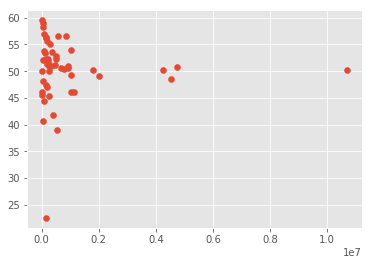

In [296]:
plt.scatter(statesData['Immigrant Population'], tweetsStates['Percentage Trump'])
plt.show()

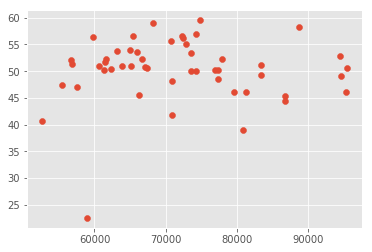

In [295]:
plt.scatter(statesData['Median Family Income'], tweetsStates['Percentage Trump'])
plt.show()

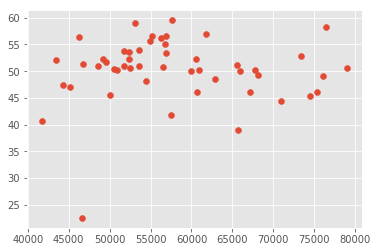

In [294]:
plt.scatter(statesData['Median Household Income'], tweetsStates['Percentage Trump'])
plt.show()

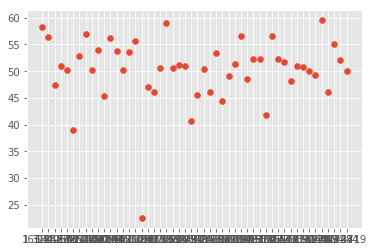

In [293]:
plt.scatter(statesData['Popular vote trump'], tweetsStates['Percentage Trump'])
plt.show()

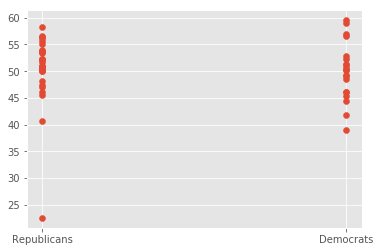

In [292]:
plt.scatter(statesData['Winning Party'], tweetsStates['Percentage Trump'])
plt.show()

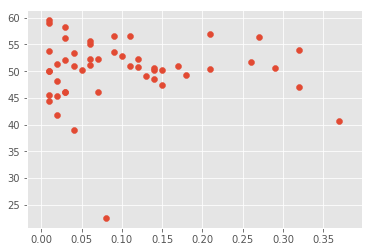

In [291]:
plt.scatter(statesData['Black'], tweetsStates['Percentage Trump'])
plt.show()

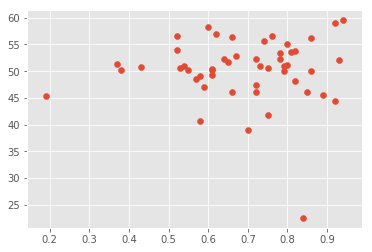

In [290]:
plt.scatter(statesData['White'], tweetsStates['Percentage Trump'])
plt.show()

## Visualize positivity in maps

### Visualize postivity in maps -- step 1: Get the state where the user is tweeting

In [87]:
#Find the states
states= ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']
state_bucket = []
for tweet in tweets['place']:
    if tweet['country'] == 'United States':
#             long_text =tweet['bounding_box']['coordinates'][0][0][0]
#             lat_text  =tweet['bounding_box']['coordinates'][0][0][1]   
        state = tweet['full_name'][-2:]
        if any(state in s for s in states):
            state_bucket.append(state)
        else:
            state_bucket.append('cleansing')

    else:
        state_bucket.append('No state found')

LA
No state found
MD
CA
NJ
TX
No state found
MD
MI
KY
IA
No state found
Cleansing
TX
No state found
FL
No state found
No state found
TX
No state found
Cleansing
FL
CA
MA
CA
PA
No state found
Cleansing
No state found
CA
No state found
VA
AZ
Cleansing
MI
MD
NY
UT
OR
NY
Cleansing
Cleansing
MD
Cleansing
MD
No state found
No state found
No state found
Cleansing
No state found
Cleansing
Cleansing
Cleansing
No state found
No state found
No state found
Cleansing
Cleansing
No state found
Cleansing
KY
NY
No state found
CT
Cleansing
Cleansing
No state found
PA
MO
FL
Cleansing
No state found
Cleansing
TX
Cleansing
VA
No state found
MD
Cleansing
No state found
PA
FL
Cleansing
Cleansing
Cleansing
SC
DE
No state found
FL
No state found
FL
No state found
FL
No state found
FL
NY
OK
CT
No state found
IL
PA
TX
FL
No state found
Cleansing
No state found
No state found
No state found
TX
Cleansing
TN
MA
No state found
TX
NY
Cleansing
Cleansing
LA
Cleansing
Cleansing
Cleansing
MA
LA
Cleansing
LA
NJ
KS
No sta

Cleansing
No state found
No state found
Cleansing
Cleansing
Cleansing
NM
CO
ND
NY
No state found
MA
FL
IL
Cleansing
NH
Cleansing
Cleansing
Cleansing
MD
KY
CA
Cleansing
FL
IL
NY
Cleansing
Cleansing
CA
Cleansing
NC
ND
AZ
No state found
NM
NJ
FL
Cleansing
TX
Cleansing
OK
GA
CA
Cleansing
AZ
MI
CA
Cleansing
Cleansing
No state found
Cleansing
Cleansing
Cleansing
WI
Cleansing
No state found
TX
MA
TX
Cleansing
MD
CA
NJ
No state found
MI
MA
No state found
NY
PA
Cleansing
Cleansing
No state found
FL
AZ
Cleansing
TN
Cleansing
CO
No state found
TX
TN
NY
NJ
CA
WA
CO
SC
MN
FL
GA
Cleansing
Cleansing
VA
CO
GA
No state found
AZ
No state found
FL
Cleansing
Cleansing
IN
NY
Cleansing
Cleansing
Cleansing
NJ
MD
Cleansing
AZ
MA
MD
Cleansing
Cleansing
Cleansing
NY
IL
No state found
TX
Cleansing
IL
MA
TX
MD
MA
Cleansing
NY
NC
KS
No state found
Cleansing
WA
Cleansing
NJ
Cleansing
NY
Cleansing
TX
Cleansing
No state found
IL
IN
NC
CA
KY
No state found
CT
AZ
NY
AZ
Cleansing
No state found
Cleansing
FL
NY
Cleansing

AL
No state found
No state found
CA
CA
KS
CA
CO
CA
MA
NY
NY
Cleansing
Cleansing
MO
MI
WA
PA
MO
Cleansing
No state found
FL
AZ
Cleansing
CA
Cleansing
NC
MA
NY
No state found
FL
Cleansing
MI
CA
MA
Cleansing
No state found
CO
No state found
Cleansing
UT
CA
Cleansing
GA
CO
Cleansing
NC
WA
WI
MD
Cleansing
CO
NH
No state found
CO
MA
CA
NC
TX
WA
Cleansing
CO
No state found
NY
TX
CA
NJ
IL
CO
Cleansing
Cleansing
No state found
Cleansing
CO
CA
TX
CO
Cleansing
IN
NY
Cleansing
MA
CO
WI
No state found
Cleansing
CA
CO
TX
NY
MN
RI
WA
Cleansing
No state found
CA
Cleansing
Cleansing
NY
No state found
CA
FL
NY
No state found
MN
NY
MA
Cleansing
AL
TX
OK
CA
OH
SC
GA
TX
No state found
Cleansing
CA
NY
OH
CO
NY
CA
WA
Cleansing
NM
Cleansing
Cleansing
FL
CA
FL
Cleansing
Cleansing
MI
CA
CA
CA
No state found
NE
Cleansing
CA
OR
FL
Cleansing
AR
CA
CA
CA
No state found
SD
CA
WA
No state found
Cleansing
SC
Cleansing
CO
NY
CO
Cleansing
FL
WA
CO
No state found
CA
NC
Cleansing
Cleansing
TX
TX
PA
NH
Cleansing
OH
No stat

CT
AZ
NC
NM
MD
PA
TX
CA
Cleansing
CA
RI
OH
Cleansing
MD
Cleansing
CA
No state found
TX
FL
TX
VA
VA
NY
Cleansing
VA
Cleansing
Cleansing
No state found
TX
NC
AZ
NY
NJ
FL
NJ
No state found
CA
TN
No state found
WV
PA
NY
FL
CA
SC
ME
Cleansing
No state found
TX
NV
Cleansing
WA
Cleansing
KS
Cleansing
NY
SC
NY
FL
NY
CA
CA
No state found
Cleansing
RI
Cleansing
WI
FL
TX
TX
Cleansing
No state found
CA
FL
VA
NV
Cleansing
NV
Cleansing
NV
NV
RI
CA
NV
No state found
FL
NV
Cleansing
OH
NV
NV
CA
No state found
No state found
CA
Cleansing
NV
MS
Cleansing
CA
Cleansing
No state found
No state found
No state found
VA
NV
Cleansing
OH
FL
Cleansing
NV
NJ
Cleansing
Cleansing
TX
CA
NV
RI
WI
SC
IL
CA
TX
CA
Cleansing
NY
Cleansing
CA
NY
No state found
FL
LA
LA
FL
Cleansing
CA
CA
CA
FL
No state found
SC
MI
CO
NM
NM
Cleansing
Cleansing
Cleansing
NY
RI
NH
UT
FL
TX
WI
CO
No state found
NM
No state found
TX
TX
AZ
No state found
Cleansing
Cleansing
MI
CA
No state found
Cleansing
TN
No state found
No state found
FL
FL
Cl

OH
NC
NY
Cleansing
TX
NY
CA
CA
No state found
CA
LA
Cleansing
Cleansing
WA
Cleansing
NY
IA
Cleansing
Cleansing
CA
Cleansing
TX
No state found
No state found
Cleansing
MD
Cleansing
No state found
MA
Cleansing
IL
PA
CA
No state found
NY
NY
IL
IN
IL
MO
MI
AZ
VA
AZ
TX
Cleansing
Cleansing
Cleansing
AZ
MI
SC
No state found
VA
AZ
CA
NY
CA
PA
MO
MA
CA
NE
GA
LA
OH
NY
CA
IL
TX
Cleansing
No state found
No state found
NV
Cleansing
Cleansing
AZ
PA
Cleansing
MI
No state found
MI
NC
IL
Cleansing
Cleansing
PA
AZ
IL
No state found
No state found
Cleansing
No state found
No state found
No state found
NC
PA
CA
CA
TX
Cleansing
PA
PA
No state found
NY
OH
IL
TX
Cleansing
Cleansing
IA
MO
Cleansing
FL
NY
OH
No state found
No state found
TN
VA
No state found
Cleansing
IL
CA
NY
Cleansing
OH
NM
Cleansing
MA
CA
MD
No state found
IL
OH
NY
LA
CT
Cleansing
CA
AZ
Cleansing
NJ
FL
PA
Cleansing
AZ
NC
IL
CO
TX
IL
NY
Cleansing
AZ
Cleansing
NY
No state found
MD
SC
HI
CA
NY
CO
TN
Cleansing
MO
FL
No state found
MA
MI
MA
PA
C

CA
CA
No state found
TX
FL
No state found
Cleansing
FL
No state found
No state found
OR
AZ
No state found
NH
FL
GA
VA
No state found
UT
NY
AZ
ME
Cleansing
Cleansing
UT
AZ
TX
FL
No state found
CA
NV
Cleansing
Cleansing
NJ
WI
MA
Cleansing
FL
Cleansing
NJ
Cleansing
Cleansing
TX
CA
Cleansing
No state found
No state found
PA
GA
Cleansing
CA
CA
No state found
PA
Cleansing
NY
PA
NY
VA
No state found
FL
KS
NC
Cleansing
FL
Cleansing
No state found
Cleansing
No state found
No state found
CA
GA
Cleansing
CA
VA
CA
Cleansing
Cleansing
No state found
CA
No state found
OH
AZ
Cleansing
AL
Cleansing
TX
Cleansing
No state found
KS
GA
CA
No state found
CA
IN
MS
OH
OR
NV
FL
Cleansing
NY
PA
Cleansing
FL
Cleansing
NY
TX
FL
No state found
NY
FL
No state found
MT
Cleansing
NV
Cleansing
NC
NY
MN
OH
NY
NY
MI
OR
FL
NV
NY
PA
ME
PA
Cleansing
NY
Cleansing
FL
NJ
Cleansing
Cleansing
OH
Cleansing
FL
Cleansing
Cleansing
VA
AZ
PA
FL
PA
NY
LA
FL
Cleansing
KS
No state found
CT
Cleansing
No state found
TX
FL
No state found

NV
NJ
Cleansing
TX
MI
MI
IA
AZ
WA
TX
Cleansing
Cleansing
MD
MA
MN
Cleansing
TX
Cleansing
Cleansing
MA
NJ
IL
TX
MO
FL
NH
Cleansing
AZ
Cleansing
No state found
CO
VA
CA
Cleansing
MN
VA
Cleansing
CA
Cleansing
IN
MI
NY
Cleansing
PA
Cleansing
FL
AL
CA
No state found
NJ
AZ
VA
Cleansing
NV
Cleansing
No state found
TX
MD
CA
FL
SC
MN
AZ
NE
Cleansing
MO
CO
FL
OH
Cleansing
CA
NJ
No state found
Cleansing
NV
LA
Cleansing
OR
Cleansing
NM
AZ
FL
Cleansing
Cleansing
NY
WA
No state found
OR
Cleansing
NV
NE
MI
VA
Cleansing
MN
Cleansing
No state found
No state found
CA
Cleansing
Cleansing
NV
MD
TX
Cleansing
Cleansing
IN
CA
NV
No state found
WI
AZ
CA
GA
TX
Cleansing
TX
Cleansing
MD
NJ
Cleansing
Cleansing
WA
TX
NY
VA
NC
No state found
NY
OK
MA
Cleansing
No state found
PA
OR
IA
Cleansing
MI
RI
KS
NC
NV
NV
MI
CA
NV
NV
No state found
IN
CT
MN
Cleansing
IA
NC
AZ
IL
MO
WA
AZ
NV
MD
Cleansing
No state found
TX
FL
NV
Cleansing
IL
NY
NY
WA
CA
IL
AZ
NJ
VA
AK
MI
Cleansing
IL
FL
MD
NV
CA
Cleansing
Cleansing
WI
KS
NY
No

Cleansing
NY
CA
MD
Cleansing
IA
WI
MN
CA
WA
NM
OR
IL
Cleansing
TX
Cleansing
NH
Cleansing
Cleansing
No state found
Cleansing
MI
Cleansing
NC
OK
Cleansing
IL
CA
PA
NJ
Cleansing
IL
NC
Cleansing
WA
KY
FL
FL
Cleansing
OH
Cleansing
TX
Cleansing
MD
PA
No state found
CA
No state found
AZ
No state found
OH
IL
Cleansing
Cleansing
No state found
FL
Cleansing
IA
Cleansing
CA
NJ
MI
NY
MN
Cleansing
Cleansing
CA
Cleansing
NE
TX
Cleansing
IA
CA
TN
MA
No state found
Cleansing
CO
AL
NJ
Cleansing
Cleansing
PA
VA
No state found
Cleansing
NY
TX
CA
No state found
CA
AZ
Cleansing
Cleansing
NY
AZ
NY
IN
AZ
AZ
IA
IA
Cleansing
NJ
CA
No state found
No state found
AZ
Cleansing
CA
NH
Cleansing
Cleansing
NY
Cleansing
No state found
CA
Cleansing
Cleansing
FL
FL
MN
TX
IA
VA
WI
WV
OR
HI
FL
Cleansing
Cleansing
CA
Cleansing
Cleansing
NH
No state found
CA
FL
IL
FL
Cleansing
FL
AZ
CA
No state found
Cleansing
PA
CA
Cleansing
Cleansing
Cleansing
PA
TN
No state found
Cleansing
No state found
LA
SC
NY
Cleansing
Cleansing
FL
FL

No state found
NY
Cleansing
GA
NJ
NY
Cleansing
OR
TX
Cleansing
MO
FL
NJ
UT
FL
MD
FL
Cleansing
TX
PA
MO
CA
TX
CA
Cleansing
NY
PA
NM
NJ
Cleansing
WA
TN
Cleansing
TX
CA
No state found
Cleansing
TX
NY
NY
MO
NY
TX
TX
Cleansing
LA
Cleansing
No state found
AZ
CA
GA
CA
WA
FL
NJ
WI
FL
Cleansing
Cleansing
VA
IL
AZ
Cleansing
Cleansing
TN
No state found
IL
Cleansing
WA
TX
FL
CA
TX
Cleansing
NC
Cleansing
NY
Cleansing
HI
NJ
WI
TN
CO
CA
IL
KS
FL
FL
Cleansing
Cleansing
Cleansing
TN
WA
ME
Cleansing
WI
MD
NY
MA
ME
IL
No state found
Cleansing
NY
NJ
PA
PA
FL
TX
CA
Cleansing
TX
GA
CA
NY
IL
TN
NY
AZ
AZ
TX
NJ
VA
Cleansing
FL
Cleansing
WA
WA
Cleansing
Cleansing
IL
PA
TX
CA
Cleansing
No state found
WA
CA
NJ
CO
GA
LA
TX
WA
FL
Cleansing
TX
TX
TX
Cleansing
ME
MA
PA
No state found
Cleansing
Cleansing
Cleansing
WA
OH
Cleansing
CA
NJ
No state found
No state found
No state found
NM
Cleansing
Cleansing
Cleansing
CA
ME
AZ
MA
CO
AZ
WA
TX
OH
CA
NJ
PA
Cleansing
No state found
No state found
NY
Cleansing
WV
NY
Cleansing
TX

Cleansing
TX
Cleansing
MA
Cleansing
Cleansing
No state found
Cleansing
ME
Cleansing
TX
NC
Cleansing
PA
Cleansing
No state found
MA
FL
Cleansing
PA
MA
Cleansing
TN
Cleansing
TX
IL
MA
NY
FL
NY
MA
PA
NM
No state found
NC
NC
MD
FL
No state found
CA
TX
CT
FL
No state found
NJ
Cleansing
Cleansing
NY
Cleansing
MA
IL
TX
NJ
MA
NY
No state found
Cleansing
TN
FL
ME
NY
TX
No state found
NJ
MA
No state found
DE
MD
NJ
Cleansing
FL
MO
Cleansing
CO
MA
No state found
TX
NY
MD
VA
MA
KS
Cleansing
Cleansing
MN
MA
MO
Cleansing
Cleansing
TX
MO
IL
NY
MD
MO
Cleansing
Cleansing
NC
Cleansing
IL
TX
Cleansing
MO
Cleansing
Cleansing
No state found
SC
MA
Cleansing
Cleansing
Cleansing
FL
PA
Cleansing
No state found
TX
IL
No state found
Cleansing
KS
OH
Cleansing
NY
ME
Cleansing
NJ
KS
Cleansing
NC
Cleansing
Cleansing
Cleansing
Cleansing
FL
MD
Cleansing
CO
Cleansing
MA
FL
No state found
Cleansing
Cleansing
No state found
No state found
IA
MD
Cleansing
VA
TX
Cleansing
Cleansing
No state found
Cleansing
Cleansing
Cleansi

No state found
PA
No state found
FL
Cleansing
Cleansing
TX
Cleansing
No state found
No state found
PA
IA
No state found
Cleansing
CA
IN
AZ
VA
VA
LA
NY
Cleansing
Cleansing
Cleansing
No state found
NV
NC
IL
PA
Cleansing
Cleansing
NV
TX
Cleansing
PA
TX
Cleansing
Cleansing
Cleansing
Cleansing
MD
TN
CA
FL
FL
PA
Cleansing
AZ
OH
SC
FL
Cleansing
CA
Cleansing
PA
SC
No state found
AZ
No state found
Cleansing
MA
OK
CO
NV
CA
Cleansing
No state found
NY
CA
AL
UT
Cleansing
No state found
PA
NC
NY
AZ
AL
NY
NV
MD
Cleansing
FL
Cleansing
CA
NJ
Cleansing
NJ
NY
CA
Cleansing
Cleansing
NC
Cleansing
PA
WA
Cleansing
AL
No state found
FL
AZ
NY
VA
NV
TN
NY
NY
No state found
No state found
Cleansing
FL
OH
CA
PA
CA
No state found
No state found
No state found
MD
AL
NJ
OH
KY
IL
Cleansing
Cleansing
Cleansing
MI
WA
DE
NY
No state found
NY
ME
IL
TX
Cleansing
IL
PA
Cleansing
MI
IL
TX
VA
FL
TN
No state found
IL
ID
NY
WA
NY
TX
Cleansing
CO
PA
WA
Cleansing
MA
MO
FL
MI
Cleansing
AL
MI
No state found
NC
MA
No state found
N

AZ
CA
Cleansing
OH
Cleansing
No state found
Cleansing
MD
CA
TX
Cleansing
PA
FL
NJ
CA
No state found
CA
Cleansing
FL
NY
Cleansing
Cleansing
OR
IL
No state found
TX
GA
Cleansing
Cleansing
CA
Cleansing
No state found
No state found
AZ
NY
Cleansing
MI
NY
Cleansing
MI
TN
NJ
Cleansing
Cleansing
Cleansing
Cleansing
TX
Cleansing
IN
TX
MA
NC
TX
Cleansing
OH
AZ
Cleansing
Cleansing
CA
Cleansing
MA
TX
CA
Cleansing
No state found
LA
CA
CA
Cleansing
IL
NY
CO
Cleansing
Cleansing
LA
PA
FL
TX
TX
Cleansing
CA
CA
NY
Cleansing
Cleansing
FL
CA
PA
Cleansing
AZ
Cleansing
Cleansing
CA
No state found
TN
No state found
CA
CA
OR
NY
Cleansing
FL
TX
AZ
Cleansing
Cleansing
MA
ID
Cleansing
Cleansing
MI
Cleansing
WA
TX
PA
No state found
No state found
OH
NV
CA
Cleansing
PA
CA
GA
Cleansing
Cleansing
No state found
NY
Cleansing
Cleansing
GA
WA
Cleansing
FL
NC
TX
AZ
CA
CA
TX
ID
FL
IL
FL
CA
Cleansing
NY
MD
CA
CA
IL
KS
Cleansing
RI
OH
MA
NY
OH
NY
Cleansing
IL
IA
Cleansing
PA
Cleansing
OR
CA
KY
MN
Cleansing
MI
TX
WA
Cleans

LA
VA
Cleansing
NH
CA
Cleansing
Cleansing
Cleansing
GA
TX
IL
No state found
Cleansing
CA
No state found
Cleansing
NY
NY
No state found
WA
TX
IA
KY
No state found
NH
Cleansing
NY
Cleansing
FL
No state found
AK
Cleansing
UT
Cleansing
TN
IL
No state found
FL
HI
TX
TN
Cleansing
CA
NY
Cleansing
AL
CA
CA
CA
KY
PA
FL
GA
NY
AZ
Cleansing
WI
CA
Cleansing
ID
Cleansing
FL
No state found
Cleansing
AZ
NV
Cleansing
Cleansing
FL
TX
NY
TX
AK
VA
Cleansing
OH
FL
No state found
NY
Cleansing
NJ
Cleansing
CA
CA
AK
Cleansing
Cleansing
FL
FL
CA
CA
CA
Cleansing
VA
Cleansing
NC
NY
TX
Cleansing
AZ
GA
OH
NY
FL
CA
VA
TX
IA
IL
NY
Cleansing
CA
Cleansing
NY
Cleansing
TX
NY
KS
NJ
NC
Cleansing
TX
IL
WA
FL
IL
NC
NY
NY
FL
ME
NY
CA
NJ
NC
Cleansing
Cleansing
TX
Cleansing
SC
KS
IN
CA
Cleansing
NV
LA
Cleansing
AL
SC
NJ
IL
VA
Cleansing
CA
TX
No state found
Cleansing
TX
MA
OH
No state found
SC
No state found
NV
SC
NY
FL
No state found
SC
TX
NC
NY
MI
WA
AZ
TX
LA
TN
NC
Cleansing
Cleansing
KY
No state found
NE
No state found
CA
N

TypeError: 'NoneType' object is not subscriptable

In [88]:
# tweets['long'] = pd.Series(long)
# tweets['lat'] = pd.Series(lat)
tweets['state'] = pd.Series(state_bucket)
tweets.drop('place',axis=1,inplace= True) ## place is niet meer nodig
tweets.drop('in_reply_to_status_id',axis=1,inplace= True) ## in_reply_to_status_id is niet meer nodig
tweets.drop('quoted_status_id',axis=1,inplace= True) ## quoted_status_id is niet meer nodig
tweets.drop('entities',axis=1,inplace= True) ## entities is niet meer nodig
tweets.drop('CleanText',axis=1,inplace= True) ## CleanText is niet meer nodig
tweets.drop('id',axis=1,inplace= True) ## id is niet meer nodig


In [89]:
## We need the whole state name
us_state_abbrev = {
    'AL': 'Alabama',    'AK': 'Alaska',    'AZ': 'Arizona',    'AR': 'Arkansas',    'CA': 'California',    'CO': 'Colorado',    'CT': 'Connecticut',    'DE': 'Delaware',
    'FL': 'Florida',    'GA': 'Georgia',    'HI': 'Hawaii',    'ID': 'Idaho',    'IL': 'Illinois',    'IN': 'Indiana',    'IA': 'Iowa',    'KS': 'Kansas',
    'KY': 'Kentucky',    'LA': 'Louisiana',    'ME': 'Maine',    'MD': 'Maryland',    'MA': 'Massachusetts',    'MI': 'Michigan',    'MN': 'Minnesota',    'MS': 'Mississippi',
    'MO': 'Missouri',    'MT': 'Montana',    'NE': 'Nebraska',    'NV': 'Nevada',    'NH': 'New Hampshire',    'NJ': 'New Jersey',    'NM': 'New Mexico',    'NY': 'New York',
    'NC': 'North Carolina',    'ND': 'North Dakota',    'OH': 'Ohio',    'OK': 'Oklahoma',    'OR': 'Oregon',    'PA': 'Pennsylvania',    'RI': 'Rhode Island',    'SC': 'South Carolina',
    'SD': 'South Dakota',    'TN': 'Tennessee',    'TX': 'Texas',    'UT': 'Utah',    'VT': 'Vermont',    'VA': 'Virginia',    'WA': 'Washington',    'WV': 'West Virginia',
    'WI': 'Wisconsin',    'WY': 'Wyoming',
}

tweets['state_whole'] = tweets['state'].map(us_state_abbrev)

In [90]:
tweets.head()

,ID,text,Mentions,Hashtags,Positive,For,state,state_whole
0,0,@BarackObama \n@FBI\n@LORETTALYNCH \nALL IN COLLUSION TOGETHER \n\n#NOJUSTICE \n\n@realDonaldTrump \n#TrumpPence \n\nhttps://t.co/5GMNZq40V3,"[barackobama, fbi, lorettalynch, realdonaldtrump]","[#nojustice, #trumppence]",True,Trump,LA,Louisiana
1,1,@HillaryClinton he will do in one year all the things you should have done in eight,[hillaryclinton],[],True,Hillary,No state found,NaN
2,2,"#CNN #newday clear #Trump deliberately throwing this race,in 2007 he knew that #ISIS and destabilization of Mideast started w/Iraq invasion",[],"[#cnn, #newday, #trump, #isis]",False,Hillary,MD,Maryland
3,3,"@realDonaldTrump, you wouldn't recognize a lie if it came from your own mouth, and they do continually. #NeverTrump https://t.co/pKSQM8yikm",[realdonaldtrump],[#nevertrump],False,Hillary,CA,California
4,4,"""Kid, you know, suing someone? Thats the most beautiful thing 1 human being could do to another human being"" @funnyordie @realDonaldTrump😂💩s","[funnyordie, realdonaldtrump]",[],True,Trump,NJ,New Jersey


### Visualize postivity in maps -- step 2: Which states are postive about Trump

In [92]:
Trump = tweets.loc[tweets['For']=="Trump"]
gem = Trump.groupby('state').Positive.mean()
avg_positive = pd.DataFrame( gem,)
avg_positive.reset_index(level=0, inplace=True)
avg_positive.columns = ['state', 'avarage_positivity']
avg_positive.avarage_positivity = avg_positive.avarage_positivity * 100
Trump = avg_positive ## give an other name for later on
avg_positive.head()

,state,avarage_positivity
0,AK,79.310345
1,AL,82.222222
2,AR,71.428571
3,AZ,85.714286
4,CA,75.471698


In [93]:
import plotly.plotly as py
import plotly.tools as tls

tls.set_credentials_file(username='fundamentals_of_datascience', api_key='IGN5rHs9tuS1kNhEPwBf')

layout = dict(title ='Positivity about Trump per state',geo= dict(scope='usa',projection=dict(type='albers usa'), showlakes= True, lakecolor = 'rgb(66,165,245)',),)
avg_positive['text'] = avg_positive['state'] + ': ' + avg_positive['avarage_positivity'].astype(str)

data = [dict(type='choropleth',autocolorscale=False,locations= avg_positive['state'], z=avg_positive['avarage_positivity'], locationmode='USA-states',text =avg_positive['text'],
             
             
#              colorscale = 'Blues'
              colorscale=[[0.0, 'rgb(165,0,38)'], [0.1111111111111111, 'rgb(215,48,39)'], [0.2222222222222222, 'rgb(244,109,67)'], [0.3333333333333333, 'rgb(253,174,97)'], [0.4444444444444444, 'rgb(254,224,144)'], [0.5555555555555556, 'rgb(224,243,248)'], [0.6666666666666666, 'rgb(171,217,233)'], [0.7777777777777778, 'rgb(116,173,209)'], [0.8888888888888888, 'rgb(69,117,180)'], [1.0, 'rgb(49,54,149)']]             
             ,colorbar= dict(title='Positivity Scale'))]
fig = dict(data=data, layout=layout)

py.iplot(fig, filename= 'd3-choropleth-map')


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~fundamentals_of_datascience/0 or inside your plot.ly account where it is named 'd3-choropleth-map'


### Visualize postivity in maps -- step 2: Which states are postive about Hillary

In [94]:
Hillary = tweets.loc[tweets['For']=="Hillary"]
gem = Hillary.groupby('state').Positive.mean()
avg_positive = pd.DataFrame( gem,)
avg_positive.reset_index(level=0, inplace=True)
avg_positive.columns = ['state', 'avarage_positivity']
avg_positive.avarage_positivity = avg_positive.avarage_positivity * 100
hillary = avg_positive ## give an other name for later on
avg_positive.head()



,state,avarage_positivity
0,AK,21.052632
1,AL,29.577465
2,AR,37.500000
3,AZ,17.379679
4,CA,29.652352


In [95]:
import plotly.plotly as py
import plotly.tools as tls

tls.set_credentials_file(username='fundamentals_of_datascience', api_key='IGN5rHs9tuS1kNhEPwBf')

layout = dict(title ='Positivity about Hillary per state',geo= dict(scope='usa',projection=dict(type='albers usa'), showlakes= True, lakecolor = 'rgb(66,165,245)',),)
avg_positive['text'] = avg_positive['state'] + ': ' + avg_positive['avarage_positivity'].astype(str)

data = [dict(type='choropleth',autocolorscale=False,locations= avg_positive['state'], z=avg_positive['avarage_positivity'], locationmode='USA-states',text =avg_positive['text'],
             
             
#              colorscale = 'Blues'
              colorscale=[[0.0, 'rgb(165,0,38)'], [0.1111111111111111, 'rgb(215,48,39)'], [0.2222222222222222, 'rgb(244,109,67)'], [0.3333333333333333, 'rgb(253,174,97)'], [0.4444444444444444, 'rgb(254,224,144)'], [0.5555555555555556, 'rgb(224,243,248)'], [0.6666666666666666, 'rgb(171,217,233)'], [0.7777777777777778, 'rgb(116,173,209)'], [0.8888888888888888, 'rgb(69,117,180)'], [1.0, 'rgb(49,54,149)']]             
             ,colorbar= dict(title='Positivity Scale'))]
fig = dict(data=data, layout=layout)

py.iplot(fig, filename= 'd3-choropleth-map')


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~fundamentals_of_datascience/0 or inside your plot.ly account where it is named 'd3-choropleth-map'


## Correlations with income --- PROTO

We make two datasets income_versus_hillary and income_versus_trump, lets see if we can make some correlations.

In [96]:
income = pd.read_csv("C:\\Users\\Jeffr\\Downloads\\FDScase1\\income_dataset.txt", sep=';', header=0)
income.columns = ["state", "median_household_income", "median_family_income", "per_capita_income"]
income['state'] = income['state'].str.strip() ## white spaces

income['median_household_income'] = income['median_household_income'].str.strip().str.replace(',','') ## white spaces
income['median_household_income'] = pd.to_numeric(income['median_household_income'])


Hillary = tweets.loc[tweets['For']=="Hillary"]
gem = Hillary.groupby('state_whole').Positive.mean()
Hillary_avg_positive = pd.DataFrame( gem,)
Hillary_avg_positive.reset_index(level=0, inplace=True)
Hillary_avg_positive.columns = ['state', 'avarage_positivity']
income_versus_hillary = pd.merge(Hillary_avg_positive,income, how='left', left_on='state', right_on='state')
income_versus_hillary.head()


Trump = tweets.loc[tweets['For']=="Hillary"]
gem = Trump.groupby('state_whole').Positive.mean()
Trump_avg_positive = pd.DataFrame( gem,)
Trump_avg_positive.reset_index(level=0, inplace=True)
Trump_avg_positive.columns = ['state', 'avarage_positivity']
income_versus_trump = pd.merge(Trump_avg_positive,income, how='left', left_on='state', right_on='state')
income_versus_trump.head()

FileNotFoundError: File b'C:\\Users\\Jeffr\\Downloads\\FDScase1\\income_dataset.txt' does not exist

In [ ]:
fig, ax = plt.subplots()
plotting = ax.scatter(income_versus_hillary['avarage_positivity'],income_versus_hillary['median_household_income'])

In [ ]:
income_versus_hillary['avarage_positivity'].corr(income_versus_hillary['median_household_income'])



# income_versus_trump.info()
